This is a simple illustration of a Genetic Algorithm solving the All-Ones problem and similar problems. The code is not optimise for speed, but could be useful to get started.

In [219]:
import numpy as np
import pylab
import itertools

We start with some definitions: 
 - The problem dimension D is usually implied by the application domain, but it may be useful to optimise the representation
 - The population size (usually a few dozens, but can be more in complex problems) and the maximial run time is limited by the available computation resources
 - For mutation and crossover proabilities we take standard values, please check whether other values give better results 

In [220]:
D = 10; # Dimension of the search space
        # an feature characterises the problem to be solved
    
N = 10; # Size of the population of solutions, usually much larger
T = 100; # Number of generations. Often needs to be larger than this.
p_c = 0.7; # Crossover probability
p_m = 0.01; # Mutation probbability

Z = 10; # For evaluation, it is a good idea to run the algorithms several times,
        # to find out whether it consistently gives good results.  

Elitism is not implemented here. What does it mean and how can you include it here?

In [221]:
elitism = 0; # A binary switch for whether elitism is used (1) or not (0) 

We will now generate a goal which will then be maximum of the fitness function.

In [222]:
goal = np.random.randint(2, size = D)
# This is not really different from the all-ones as a goal:
# goal = np.ones((D,), dtype=int)
# More important is the way in which the goal is represened in the fitness function, see below.
print(goal)

[0 0 0 0 0 1 0 1 1 1]


In [223]:
def fitness_func(solution, population):
    fitness_list = np.zeros(N)
    # We compare simply the elements of the goal (see above) with the current solutions
    # Summing over the binary values, we get a fitness
    for member in range(len(population)):
        fitness = np.count_nonzero(solution==population[member])
        if fitness != D: fitness = 0 # This turns the problem into a needle-in-the-haystack problem, 
        # which may require a large T to be solvable 
        # fitness = (fitness//4)*4 # What does this do to the problem? 
        fitness_list[member] = fitness
        # And then we sort the population by descending fitness, this is useful for 
        fitness_indices = (-fitness_list).argsort()
        sorted_pop = population[fitness_indices]
    avg_fitness = np.sum(fitness_list)/N
    max_fitness = max(fitness_list)
    fitness_list = fitness_list[fitness_indices]
    return sorted_pop, fitness_list, avg_fitness, max_fitness

In [224]:
def roulette_wheel_selection(sorted_pop, fitness_list):
    intermediate_pop = np.zeros((N,D))
    select_from = np.arange(N)
    total_fit = np.sum(fitness_list)
    if total_fit == 0: 
        total_fit=1
        relative_fitness= fitness_list +1/N
    else:
        relative_fitness = fitness_list / total_fit
    mating_population = np.random.choice(select_from,N, p=relative_fitness)
    for member in range(len(mating_population)):
        intermediate_pop[member] = sorted_pop[mating_population[member]]
    return intermediate_pop

In [225]:
def crossover(parent1, parent2):
    c_point = np.random.randint(0, D) # Crossover point
    child1 = np.zeros(D)
    child2 = np.zeros(D)
    for chromosome in range(c_point):
        child1[chromosome] = parent1[chromosome]
        child2[chromosome] = parent2[chromosome]
    for chromosome in range(D-c_point):
        child1[c_point+chromosome] = parent2[c_point+chromosome]
        child2[c_point+chromosome] = parent1[c_point+chromosome]
    return child1, child2

In [226]:
def mutate(population):
    for member in range(len(population)):
        for chromosome in range(D):
            if np.random.rand()<p_m:
                if population[member][chromosome] == 0:
                    population[member][chromosome] = 1
                else:
                    population[member][chromosome] = 0
    return population

In [227]:
def new_generation(intermediate_pop):
    new_pop = np.zeros((N,D))
    parent_list = np.arange(N)
    pairings = np.random.choice(parent_list, (2,int(N/2)), replace =False)
    #print(pairings)
    for x in range(np.int(N/2)):
        parent1 = pairings[0][x]
        parent2 = pairings[1][x]
        new_pop[x], new_pop[(N-1)-x] = crossover(intermediate_pop[parent1], intermediate_pop[parent2])
    mutate(new_pop)
    return new_pop

In [228]:
init_pop = np.random.randint(2, size = (N,D))
#print(init_pop)

In [229]:
generation_avg_fitness = []
generation_max_fitness = []
cur_gen = init_pop
for t in range(T):
    sorted_pop, fitness_list, avg_fitness, max_fitness = fitness_func(goal, cur_gen)
    generation_avg_fitness.append(avg_fitness)
    generation_max_fitness.append(max_fitness)
    intermediate_pop = roulette_wheel_selection(sorted_pop, fitness_list)
    new_gen = new_generation(intermediate_pop)
    cur_gen = new_gen
    if max_fitness == D:
        print(f"Found perfect solution at generation {t}")
        break # you may like to remove the break to see how the avarege fitness approach the maximal fitness
print(generation_avg_fitness)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


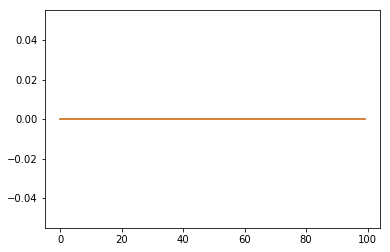

In [230]:
pylab.plot(generation_avg_fitness);
pylab.plot(generation_max_fitness);

The following will take a while to complete, you may also like to how many repetitions are needed for statistical evaluation. 

In [231]:
generation_avg_fitness = []
generation_max_fitness = []
mean_max_fitness = np.zeros(T)
for z in range(Z):
    cur_gen = init_pop
    for t in range(T):
        sorted_pop, fitness_list, avg_fitness, max_fitness = fitness_func(goal, cur_gen)
        generation_avg_fitness.append(avg_fitness)
        generation_max_fitness.append(max_fitness)
        intermediate_pop = roulette_wheel_selection(sorted_pop, fitness_list)
        new_gen = new_generation(intermediate_pop)
        cur_gen = new_gen
        mean_max_fitness[t]=(1.0-1.0/(z+1))*mean_max_fitness[t]+(1.0/(z+1))*max_fitness    

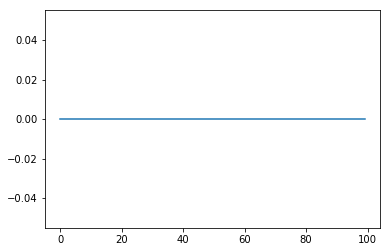

In [232]:
pylab.plot(mean_max_fitness);

Can you plot after how many generations the optimal solution is found on average (if at all)?